# Visual Data Analysis on EVDS and Google Trends Data 

#### Homework 1
#### Mustafa Kaan Aslan - Spring 21 - IE360

---


### Introduction

Series of real rent index, number of new houses sold, unit house price, "cumhuriyet" gold and dollar/turkish lira exchange rate are taken from the EVDS, with the help of the "EVDS" package. Additionally, interest of search keywords -"kiralık ev", "kiralık daire", "kiralık konut"- are subtracted from the Google Trends data. After certain data manipulation steps, the data become ready to analyze. Visual analysis is going to answer the research question "Is real rent index related to number of new houses sold, unit house price, "cumhuriyet" gold price and dollar/turkish lira exchange rate and search interests?"

In [15]:
library(EVDS)
library(zoo)
library(ggplot2)
library(data.table)
library(gtrendsR)
options(repr.plot.width = 10, repr.plot.height = 4)
options(warn = -1)

In [16]:
set_evds_key("08cb5UCQLa")
series <- get_series(series=c("TP.AKONUTSAT3.TOPLAM","TP.MK.CUM.YTL","TP.DK.USD.S.YTL","TP.FG.J041",
                          "TP.TCBF01.TURKIYE"),start_date="01-01-2013",end_date="01-01-2021")

In [17]:
evds_dt <- data.table(series$items)[,`:=`(Date = as.Date(as.yearmon(Tarih)),
                 rent_index = as.numeric(TP_FG_J041),
                 new_houses_sold = as.numeric(TP_AKONUTSAT3_TOPLAM),
                 cumhuriyet_gold_price = as.numeric(TP_MK_CUM_YTL),
                 dollar_rate = as.numeric(TP_DK_USD_S_YTL),
                 unit_house_price = as.numeric(TP_TCBF01_TURKIYE))][,8:13]

In [18]:
trends_dt <- gtrends(c("kiralık daire","kiralık ev","kiralık konut"),
                      geo="TR",
                      time = "2013-01-01 2021-01-01",
                      onlyInterest = TRUE)

trends_dt <- data.table(trends_dt$interest_over_time)
trends_dt <- trends_dt[,`:=`(date = as.Date(date),
                               hits = as.numeric(hits))]
trends_dt[is.na(hits),2] <- 0
trends_dt <- trends_dt[,.(gtrends=sum(hits)),by=.(date)][,1:2]   

data <- trends_dt[evds_dt, on = .(date=Date)]


### 1) Number of new houses sold

Every year, new houses constructed may increase the supply of rental houses and with the increase in supply rental house prices could decrease.

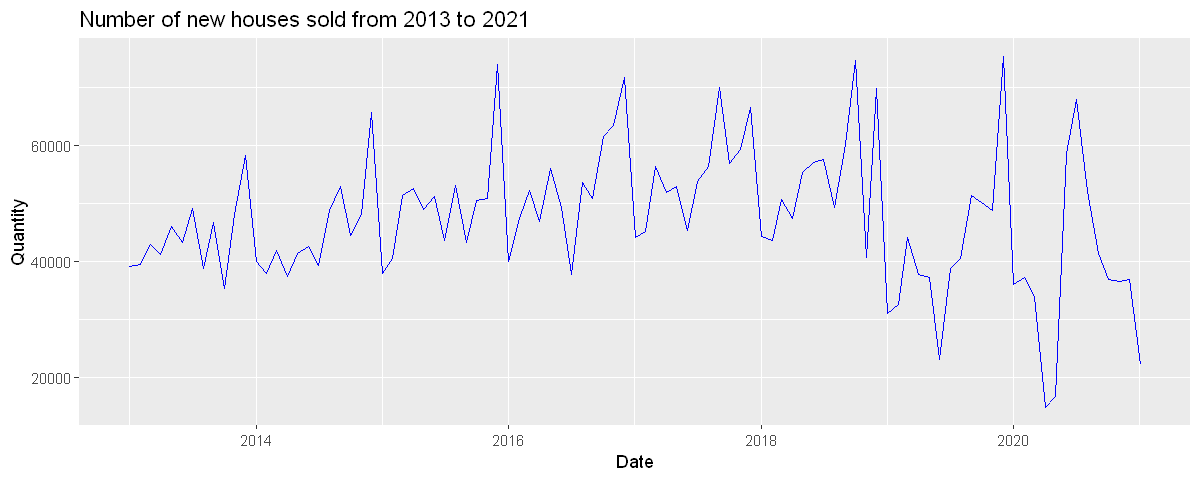

In [19]:
ggplot(data,aes(x=date, y=new_houses_sold)) +
geom_line(color="blue") +
labs(title= "Number of new houses sold from 2013 to 2021", x= "Date", y="Quantity")


- According to the graph, there is a big decrease in number of houses sold in recent years.
- There are seasonal changes, for example number of sales increases at july and december but decreases at august and january almost every year.
- At 2019, there is a bigger decrease in sales at january and all time low before pandemic occured . The reason might be the high enflation rates in 2018.
- The minimum number of sales occurs in 2020 due to the COVID-19 pandemic. However, there is a huge increase at july  which is interesting. The reason of the increase might be that people coulnd't spend much money in lockdowns and bought new houses with their savings.

### 2) "Cumhuriyet" Gold Price and Dollar Rate
Increasing price of gold and dollar rate leads to enflation and enflation could increase the rent prices.

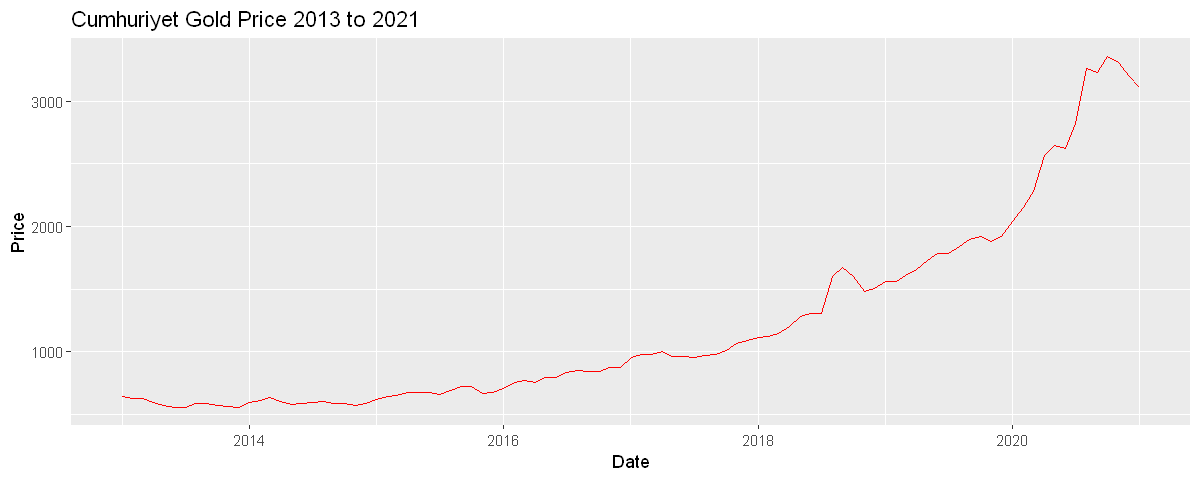

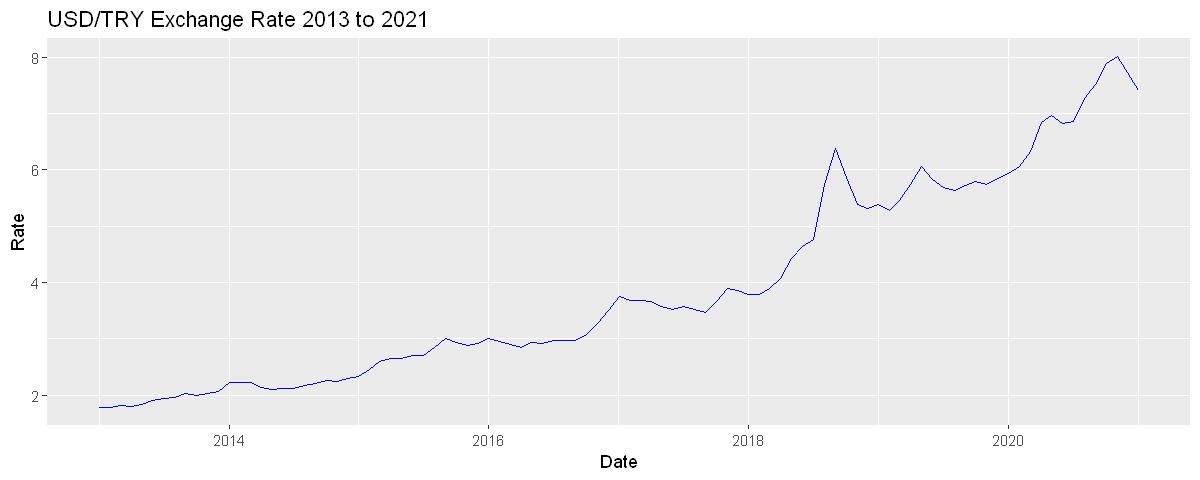

In [20]:
ggplot(data,aes(x=date,y=cumhuriyet_gold_price)) +
geom_line(color="red") +
labs(title= "Cumhuriyet Gold Price 2013 to 2021", x= "Date", y="Price")

ggplot(data,aes(x=date,y=dollar_rate)) +
geom_line(color="blue") +
labs(title= "USD/TRY Exchange Rate 2013 to 2021", x= "Date", y="Rate")

- There is an upward trend both on dollar rate and gold price from year 2013 to 2021.
- Although there are some monthly increases and decreases there is no specific seasonality.
- A big increase in dollar rate occurs in the summer of 2018 due to the "Papaz" crisis. Non-stopping enflation of a country might be an abnormality, too.

### 3) Unit House Prices
Turkish liras per square meter defines the price of a house. High-priced houses tend to be rented in higher prices.

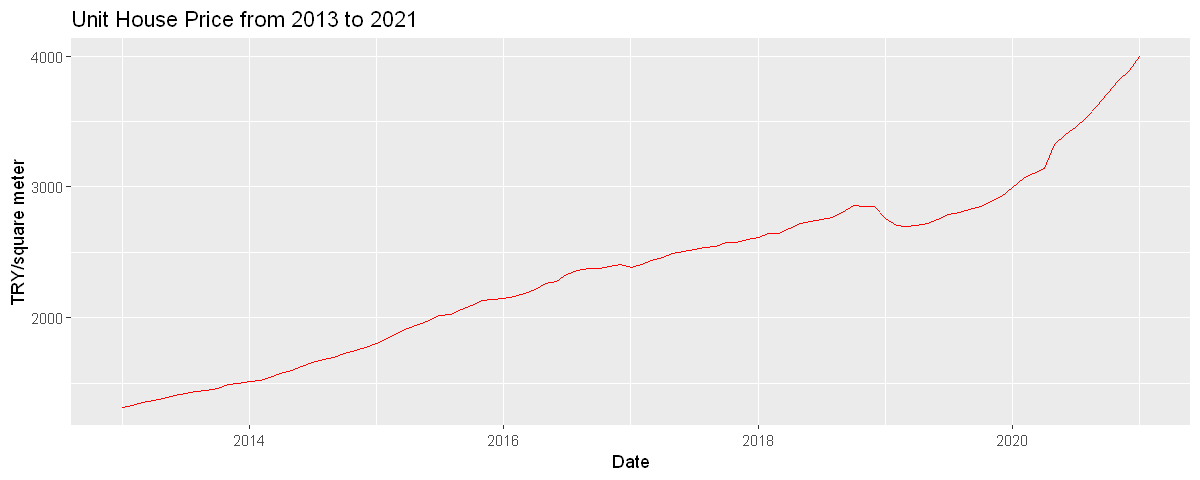

In [21]:
ggplot(data,aes(x=date,y=unit_house_price)) +
geom_line(color="red") +
labs(title= "Unit House Price from 2013 to 2021", x= "Date", y="TRY/square meter")

- There is an upward trend probably due to the enflation.
- An increase and a decrease aftearwards, occurs in summer the of 2018. This change might occured due to the increase in dollar rate. When dollar rate increased, people might wanted to sell their house at higher prices but when it was not sold, they decreased the price again.

### 4) Google Trends Data
Higher interest in keywords like "kiralık daire" may imply the increase in the demand of houses for rent.

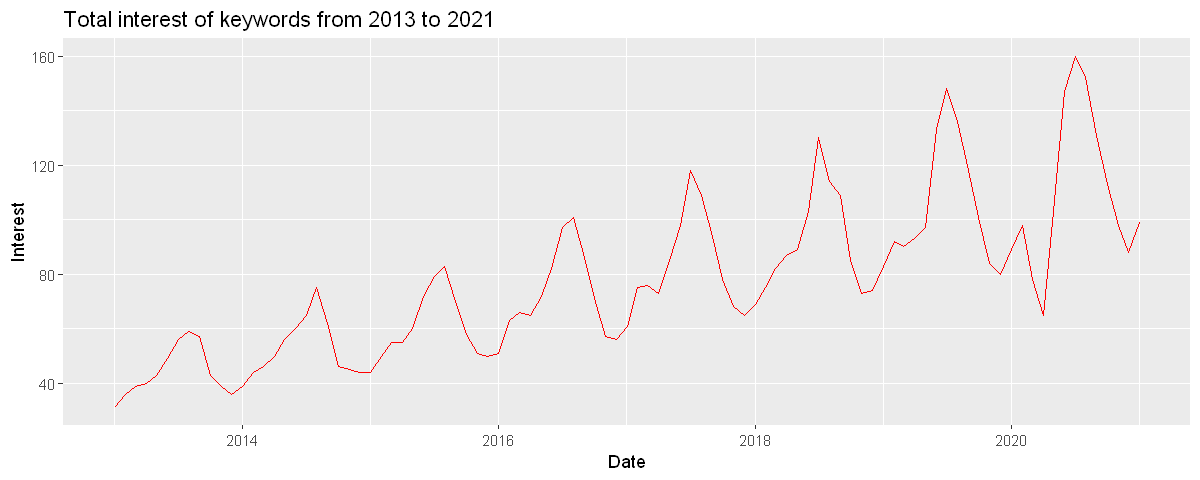

In [22]:
ggplot(data,aes(x=date,y=gtrends)) +
geom_line(color="red") +
labs(title= "Total interest of keywords from 2013 to 2021", x= "Date", y="Interest")

- There is an increasing trend however, accessibility of internet could also provide this trend besides from the demand.
- Every year, there is an increase in the interest at july. With the increase number of houses sold, it could be said that people tend to buy or rent a new house in the summers, especially at july.
- Due to COVID-19 pandemic, there is an unnatural decrease at the march of 2021, but interest increased to normal seasonal level at july.

### 5) Real Rent Index and Conclusion


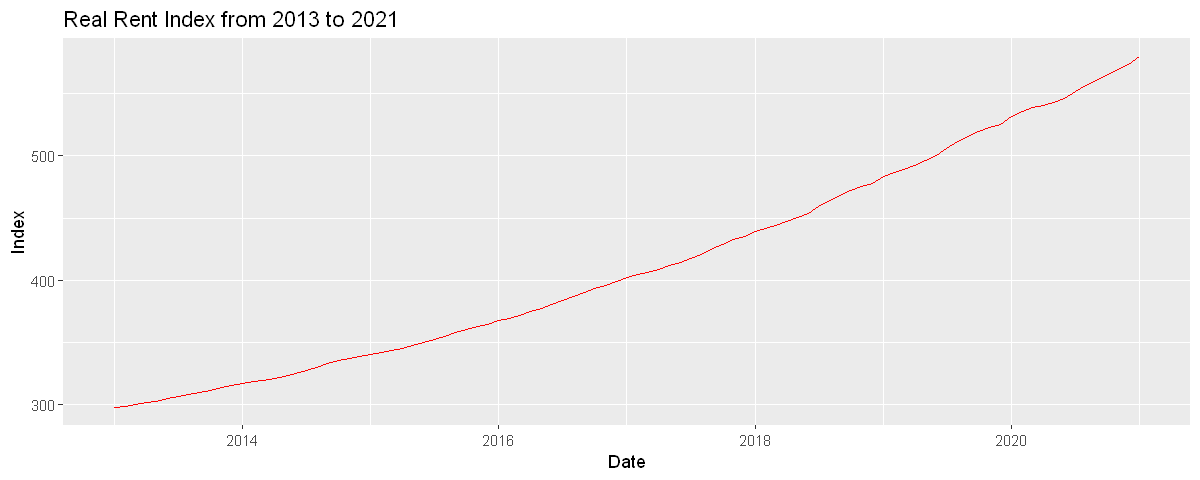

In [23]:
ggplot(data,aes(x=date,y=rent_index)) +
geom_line(color="red") +
labs(title= "Real Rent Index from 2013 to 2021", x= "Date", y="Index")

- Increasing trend can be observed in real rent index, too. It is a nearly linear graph with no seasonalites or abnormalities.
- It could be said that real rent index is highly correlated with dollar rate, "cumhuriyet" gold price and unit house price.
- Google trends data is correlated but the same seasonality could not be observed in real rent index. It means that landlords don't change their houses for rent prices in the seasons with higher demand.
- The total number of new houses sold seems not to affect the real rent index.